In [46]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import animation, rc
from IPython.display import HTML
import sys

Populating the interactive namespace from numpy and matplotlib


In [47]:
def print_progess(progress):
    sys.stdout.write("\r" + str(progress))
    sys.stdout.flush()

def load_frame(frame_index):
    im = mpimg.imread('../_Recordings/test/%d.png' % frame_index)
    # rotate the image
    im = im[::-1] 
    # add some color
    im = np.array(im[:,:,0])
    return im

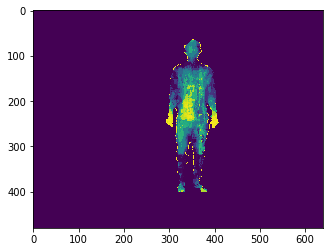

In [49]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

FRAME_COUNT = 742
FRAMES_PER_SECOND = 60
frames = []
for i in range(FRAME_COUNT):
    frame = load_frame(i) #'../_Recordings/test/%d.png' % i)
    frame = plt.imshow(frame, animated=True)
    frames.append([frame])
    print_progess("Loaded %d / %d images\r" % (i+1, FRAME_COUNT))

anim = animation.ArtistAnimation(fig, frames, interval=1000/60, blit=True, repeat_delay=1000)
HTML(anim.to_html5_video())
rc('animation', html='html5')
anim

Relevant papers:
<br>
<a href="https://www.reactivereality.com/static/pdf/paper69.pdf" target="_blank">Skeletal Graph Based Human Pose Estimation in Real-Time</a>
<br>
<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2753723/" target="_blank">Three-Dimensional Neuron Tracing by Voxel Scooping</a>

(350, 64)


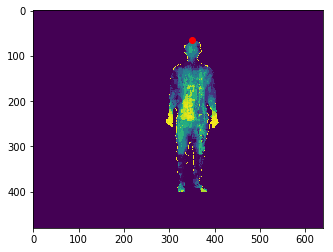

In [176]:
# Load single frame
#im = load_frame(180)
#im = load_frame(280)
frame = load_frame(741)

# Highest point = head = starting point of skeletal graph
highest_j = False
highest_i = False
for j in range(frame.shape[0]):
    for i in range(frame.shape[1]):
        highest_j = j
        if frame[j,i] != 0.0:
            highest_i = i
            break
    if highest_i != False:
        break
highest_point = (highest_i, highest_j)
            
print(highest_point)

# Display single frame
plt.figure()
plt.imshow(frame) 
plt.plot((highest_point[0]), (highest_point[1]), 'ro', label='line 1', linewidth=2)
plt.show()

### Pseudo Code of the tracing algorithm

```
MARK all voxels as unvisited
SELECT seed voxel

ITERATION 1:
  CREATE cluster C1,1 from seed voxel
  MARK seed voxel as visited
  CREATE node N1,1 at center of seed voxel

ITERATION i>1:
  WHILE any clusters exist in previous iteration i-1
    FOR every cluster Ci-1,j created in the previous iteration i-1
      FIND all unvisited object voxels in 26-connected neighborhood of Ci-1,j
      MARK all found voxels as visited
      FOR every connected component k of found voxels
        CREATE cluster Ci,k from voxels of connected component k
        CREATE node Ni,k at location given by equation (1)
        CREATE connection from node Ni,k to node Ni-1,j
        SET scooping distance to the largest distance of any voxel in Ci,k to Ni,k
        WHILE any connected, unvisited, object voxel within scooping distance from Ni,k
          ADD voxel to cluster Ci,k and MARK voxel as visited
        END WHILE
      END FOR
    END FOR
  END WHILE
```

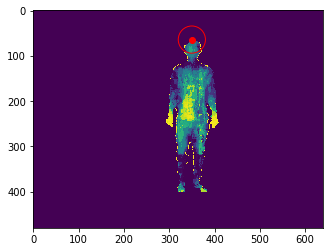

In [183]:
class Voxel:
    def __init__(self, point):
        self.point = point
        self.visited = False
class Cluster:
    def __init__(self, voxel, timestep):
        self.voxel = voxel
        self.radius = 1
        self.timestep = timestep
class Node:
    def __init__(self, point):
        return
        
seed_voxel = Voxel(highest_point)
seed_voxel.visited = True
clusters = []
cluster1 = Cluster(seed_voxel, 1)
cluster1.radius = 1
clusters.append(cluster1)
#help(imshow) 

plt.figure()
plt.imshow(frame) 
plt.plot((highest_point[0]), (highest_point[1]), 'ro', label='line 1', linewidth=2)
circle1 = plt.Circle(highest_point, 30, color='r', fill=False)
plt.gcf().gca().add_artist(circle1)
plt.plot()
plt.show()
